In [3]:
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.autograd import Variable
import pickle 
from ply import write_ply

from scipy.special import sph_harm

from utilities import *
from VoxelGrid import *
import os


from skimage.metrics import peak_signal_noise_ratio

os.environ['CUDA_LAUNCH_BLOCKING'] = "1"
device='cuda' if torch.cuda.is_available() else 'cpu'

N_points=200

In [8]:
dataset  = "mic"
test_focal, test_c2w, test_gt = get_data("../nerf_synthetic/"+dataset, "test")

LOAD DATA ../nerf_synthetic/mic/test


100%|█████████████████████████████████████████| 200/200 [00:03<00:00, 60.05it/s]


In [9]:
red = 8
disp_ims_test, disp_rays_test = reduce_data(test_c2w, test_gt,test_focal, red)
disp_im_w = disp_ims_test[0].shape[0]

In [10]:
VG = VoxelGridSpherical()
VG.load('mic_carve.obj')
#VG.load(dataset+"_carve.obj")
#VG.save_pointcloud()

In [ ]:
VG.colors.max()

In [11]:
compute_psnr(VG, disp_rays_test, disp_ims_test, 900)

100%|█████████████████████████████████████████| 200/200 [00:16<00:00, 12.02it/s]


22.76445417998634

In [20]:
with torch.no_grad():
    VG.colors[:] *= 1.05

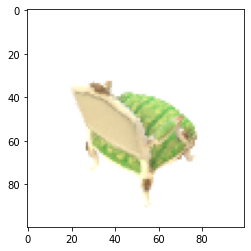

In [21]:
image_ind = 10 
im1 = VG.render_large_image_from_rays(disp_rays_test[image_ind], (900, 1.2), 500)
plt.imshow(im1)

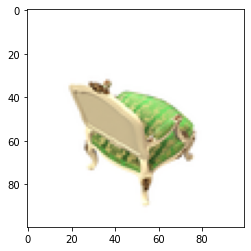

In [9]:
plt.imshow(disp_ims_test[image_ind])

In [66]:
VG.view_harmonics(torch.tensor([1,1,1]))

IndexError: Dimension out of range (expected to be in range of [-1, 0], but got 1)

In [34]:
def rolling_average2(p, k=100):
    p2 = np.zeros((p.shape[0]-k))
    for i in range(p.shape[0]-k):
        p2[i] = p[i:i+k].sum()/k
    return p2

def rolling_average(p, k=100):
    p2 = np.zeros((p.shape[0]-k))
    for i in range(k):
        p2 += p[i:-(k-i)]
    return p2/k


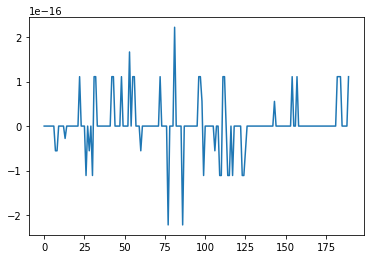

In [37]:
m = np.random.random(200)
plt.plot(rolling_average(m,10)-rolling_average2(m,10))


In [2]:
directories = [e for e in os.listdir("../nerf_synthetic") if os.path.isdir("../nerf_synthetic/"+e)]

for nerf_dir in directories:
    VG = VoxelGrid()
    VG.load(nerf_dir+".obj")
    test_focal, test_c2w, test_gt = get_data("../nerf_synthetic/"+nerf_dir, "test")
    red = 8
    disp_ims_test, disp_rays_test = reduce_data(test_c2w, test_gt,test_focal, red)
    disp_im_w = disp_ims_test[0].shape[0]
    print(nerf_dir, compute_psnr(VG, disp_rays_test, disp_ims_test))

RuntimeError: CUDA error: out of memory

In [4]:
directories = [e for e in os.listdir("../nerf_synthetic") if os.path.isdir("../nerf_synthetic/"+e)]



In [5]:
directories

['materials', 'drums', 'chair', 'mic', 'hotdog', 'lego', 'ficus', 'ship']

In [6]:
L=""
for d in directories:
    L+= "python main_carve_sph.py -model "+d+" >> out.txt ;"

In [7]:
L

'python main_carve_sph.py -model materials >> out.txt ;python main_carve_sph.py -model drums >> out.txt ;python main_carve_sph.py -model chair >> out.txt ;python main_carve_sph.py -model mic >> out.txt ;python main_carve_sph.py -model hotdog >> out.txt ;python main_carve_sph.py -model lego >> out.txt ;python main_carve_sph.py -model ficus >> out.txt ;python main_carve_sph.py -model ship >> out.txt ;'

In [2]:
L="""materials 21.37802172869226
drums 20.024169390208332
chair 24.54802949007163
mic 23.64221082784128
hotdog 23.057648712030986
lego 21.314251497142013
ficus 22.069222808748208
ship 20.877651605116593
""".split()[1::2]

In [3]:
np.array(L).astype(float).mean()

22.11390075748141

In [16]:
L=""
for d in directories:
    L+= "python main_carve2.py -model " +d+"  >> out.txt ;"
L

'python main_carve2.py -model materials  >> out.txt ;python main_carve2.py -model drums  >> out.txt ;python main_carve2.py -model chair  >> out.txt ;python main_carve2.py -model mic  >> out.txt ;python main_carve2.py -model hotdog  >> out.txt ;python main_carve2.py -model lego  >> out.txt ;python main_carve2.py -model ficus  >> out.txt ;python main_carve2.py -model ship  >> out.txt ;'

In [22]:
L=""
for d in directories:
    L+= "python main.py -dataset ../nerf_synthetic/"+d+"/ > out.txt ; "
L



'python main.py -dataset ../nerf_synthetic/materials/ > out.txt ; python main.py -dataset ../nerf_synthetic/drums/ > out.txt ; python main.py -dataset ../nerf_synthetic/chair/ > out.txt ; python main.py -dataset ../nerf_synthetic/mic/ > out.txt ; python main.py -dataset ../nerf_synthetic/hotdog/ > out.txt ; python main.py -dataset ../nerf_synthetic/lego/ > out.txt ; python main.py -dataset ../nerf_synthetic/ficus/ > out.txt ; python main.py -dataset ../nerf_synthetic/ship/ > out.txt ; '

In [27]:
"../nerf_synthetic/lego"[18:]

'lego'